# K_Means

## On SNS Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
sns = pd.read_csv("snsdata.csv")

In [4]:
sns.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [5]:
sns.gender.replace({ "M" :0 , "F" :1}, inplace=True )

In [6]:
sns.gender = sns.gender.fillna(1)
sns.age = sns.age.fillna(sns.age.mean())

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans( n_clusters = 3 )

In [9]:
kmeans.fit(sns)

KMeans(n_clusters=3)

In [10]:
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
len(kmeans.labels_)

30000

In [12]:
l1 = list(kmeans.labels_)

In [13]:
l1.count(0)

20164

In [14]:
l1.count(1)

8508

In [15]:
l1.count(2)

1328

In [16]:
kmeans.cluster_centers_ # Shows the centroids

array([[2.00745551e+03, 8.08768102e-01, 1.80332329e+01, 1.11776929e+01,
        2.40527673e-01, 2.37304106e-01, 2.05415592e-01, 1.29934537e-01,
        1.24380083e-01, 1.24231303e-01, 9.29875025e-02, 9.67070026e-02,
        8.34655822e-02, 1.33306884e-01, 2.88881174e-01, 2.07895259e-01,
        1.32215830e-01, 1.14957350e-01, 9.83435826e-02, 3.86381670e-01,
        2.85310454e-01, 3.68478476e-02, 7.19202539e-01, 2.32642333e-01,
        4.23923825e-01, 2.15582226e-01, 9.81452093e-02, 2.02836739e-02,
        4.04086491e-01, 9.95338227e-02, 8.09363222e-02, 2.29071613e-01,
        3.13231502e-01, 1.41390597e-01, 5.64372148e-02, 4.16088078e-02,
        1.79230311e-01, 1.05782583e-01, 8.47550089e-02, 6.11485816e-02],
       [2.00757605e+03, 8.53549600e-01, 1.79350145e+01, 5.73368594e+01,
        3.13704748e-01, 2.82087447e-01, 2.60695816e-01, 2.20733427e-01,
        1.77362482e-01, 1.55383169e-01, 1.24706159e-01, 1.19417019e-01,
        9.48519041e-02, 1.55500705e-01, 3.80112835e-01, 2.10037

In [17]:
df_cent = pd.DataFrame(kmeans.cluster_centers_) 
df_cent.columns = sns.columns

In [18]:
df_cent

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.455515,0.808768,18.033233,11.177693,0.240528,0.237304,0.205416,0.129935,0.124380,0.124231,0.092988,0.096707,0.083466,0.133307,0.288881,0.207895,0.132216,0.114957,0.098344,0.386382,0.285310,0.036848,0.719203,0.232642,0.423924,0.215582,0.098145,0.020284,0.404086,0.099534,0.080936,0.229072,0.313232,0.141391,0.056437,0.041609,0.179230,0.105783,0.084755,0.061149
1,2007.576046,0.853550,17.935015,57.336859,0.313705,0.282087,0.260696,0.220733,0.177362,0.155383,0.124706,0.119417,0.094852,0.155501,0.380113,0.210038,0.153738,0.142924,0.111189,0.496827,0.333333,0.048778,0.776681,0.268336,0.537612,0.306770,0.139868,0.022802,0.448402,0.130230,0.135637,0.299953,0.423484,0.161613,0.090738,0.065585,0.192055,0.129878,0.090386,0.060061
2,2007.688253,0.909639,17.775056,144.710090,0.377259,0.289157,0.243223,0.254518,0.208584,0.154367,0.198042,0.137048,0.097892,0.141566,0.472139,0.228163,0.197289,0.198795,0.125753,0.554970,0.300452,0.045181,0.771837,0.245482,0.630271,0.367470,0.145331,0.027861,0.537651,0.161145,0.137048,0.414157,0.505271,0.172440,0.140060,0.103916,0.207078,0.142319,0.121235,0.051958


In [19]:
# Sum Square Distance (SSD)

In [20]:
kmeans.fit(sns).score(sns)

-11294903.637875887

In [21]:
# For Build the elbow plot

In [22]:
l1=[]
for i in range(1,15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(sns)
    score = kmeans.fit(sns).score(sns)
    l1.append(score)

In [23]:
l1 = np.absolute(l1)

In [24]:
l2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

Text(0.5, 1.0, 'Elbow Plot')

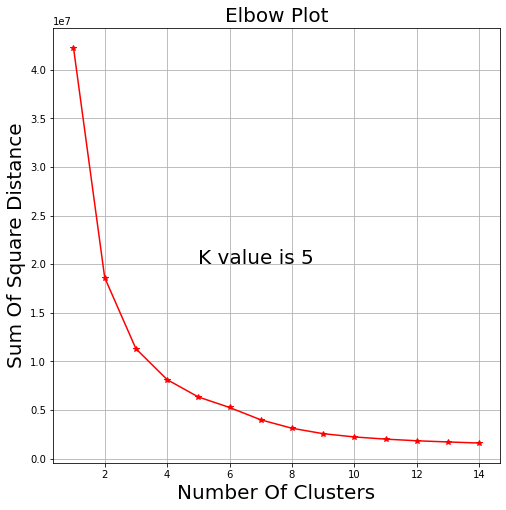

In [25]:
plt.figure(figsize = (8,8))
plt.plot(l2, l1, marker="*", color = "r")
plt.xlabel("Number Of Clusters", size = 20)
plt.ylabel("Sum Of Square Distance", size = 20 )
plt.grid()
plt.text(x= 5, y = 20000000 , s = "K value is 5", size = 20)
plt.title("Elbow Plot", size = 20)


In [26]:
kmeans = KMeans( n_clusters = 5 )
kmeans.fit(sns)

KMeans(n_clusters=5)

In [27]:
df_cent = pd.DataFrame(kmeans.cluster_centers_) 
df_cent.columns = sns.columns

In [28]:
sns["Labels"] = kmeans.labels_   # add a new data column label to your existing data

In [29]:
sns = sns.sort_values("Labels")

In [30]:
sns.head(100)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Labels
0,2006,0.0,18.98200,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16473,2008,1.0,16.69000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16471,2008,1.0,16.20300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16470,2008,1.0,16.93600,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,3,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0
16469,2008,1.0,17.07000,9,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16467,2008,1.0,18.12500,8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16466,2008,1.0,16.54500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16464,2008,1.0,66.12700,0,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16463,2008,1.0,17.24300,0,2,1,0,0,3,0,0,0,0,0,0,3,0,0,3,0,0,0,3,1,3,1,0,0,4,0,0,1,0,1,1,1,0,0,1,2,0
16461,2008,1.0,17.99395,15,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,3,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
